In [94]:
import csv
import numpy as np
import matplotlib.pyplot as plt


test_data = []
#기대되는 output
test_h = []
train_data = []
train_h = []

with open('/content/drive/My Drive/AssignmentFolder/Assignment04/data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        j = []
        j.append(1.0)
        j.append(float(i[0]))
        j.append(float(i[1]))
        j.append(float(i[2]))
        test_data.append(j)
        test_h.append(float(i[3]))
        ct += 1

with open('/content/drive/My Drive/AssignmentFolder/Assignment04/data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        j = []
        j.append(1.0)
        j.append(float(i[0]))
        j.append(float(i[1]))
        j.append(float(i[2]))
        train_data.append(j)
        train_h.append(float(i[3]))
        ct += 1

t0 = 0.0
t1 = 0.0
t2 = 0.0
t3 = 0.0
theta = np.array([t0, t1, t2, t3])

pre = np.dot(test_data, np.transpose(theta))

print(len(pre))
print(test_h)
test_h = np.array(test_h)
test_h.astype(np.float16)
test_h = np.array(test_h)
print(test_h)

test_data = np.array(test_data)
test_data.astype(np.float16)

300
[-14.055817919454796, 20.504904903622798, -73.84314764867959, -24.644937076318406, 31.934656626900196, 58.83605979480018, -20.814998770476326, -30.470476178829898, 51.86912832202987, 61.84193674889696, -2.1444964993150393, -27.308003252244326, 69.0467977779173, 87.11940540983036, -32.535573982689456, -0.9944750287536372, 65.44186802438966, 103.93766065850338, -25.052396212328993, -18.322943052610327, 121.45877402261243, 60.55497834131452, -11.650233670012113, 97.47254050647183, 121.45667500490936, 40.7825715400341, 124.34589287374858, 146.21479997804553, 132.9066693439629, 13.530127818381075, 127.1223761233056, 123.73945975255532, 27.256131038903277, 126.91236596878736, 24.425826969246778, 189.3488214716408, 145.5050905142973, 100.84768932814569, 154.75313750293856, 98.01640019181978, 117.10139547561377, 74.49293570084082, 203.34422859006193, 191.55359390241708, 95.68909690074793, 187.55148046212383, 145.28026584475273, 164.11197998382158, 142.38234757140964, 144.01585707470431, 98

array([[  1.    ,  -1.789 ,  -2.719 ,  -4.426 ],
       [  1.    ,   2.959 ,   4.516 ,   6.645 ],
       [  1.    ,  -0.5693,  10.09  , -13.27  ],
       ...,
       [  1.    , 296.5   , 292.    , 277.8   ],
       [  1.    , 301.2   , 301.2   , 302.8   ],
       [  1.    , 302.    , 292.2   , 314.2   ]], dtype=float16)

[ 0.01261008 -0.01301821  0.15741535  0.05860805 -0.06649519 -0.0748617
  0.05066386  0.07688004 -0.05516589 -0.09639038  0.07923641  0.08331009
 -0.05714999 -0.07775573  0.13351026  0.07419347 -0.00789495 -0.07577502
  0.15930042  0.10999839 -0.07531396  0.01697972  0.16090895 -0.0638925
 -0.07411598  0.09176827 -0.11430985 -0.08175978 -0.09165556  0.09906327
 -0.06315063 -0.03308785  0.12137172 -0.06087549  0.14070334 -0.15787694
 -0.06769469 -0.00833645 -0.07079854  0.02382984 -0.0109675   0.08334172
 -0.12634899 -0.13492683  0.05016209 -0.07356692  0.01961949 -0.01585073
 -0.01224453  0.01995461  0.08051561 -0.03836916  0.08848921  0.07975184
  0.01335936  0.08259909 -0.17152835  0.11481112  0.12753094  0.08667396
 -0.02145524  0.13420652 -0.03450687  0.19455838 -0.12396822  0.14017413
 -0.03158421  0.01794863 -0.09713472  0.08717044  0.09119566 -0.00749866
 -0.00434796  0.13522978  0.12707974  0.08828917  0.09181594 -0.0543926
  0.01712871 -0.08553564  0.02524052 -0.10887312  0.16

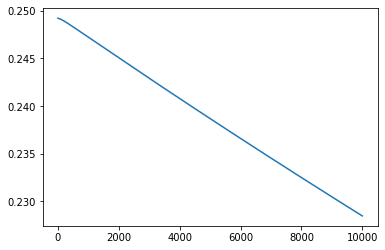

In [96]:
np.seterr(over = "raise")

test_data = test_data / np.mean(test_data)
test_h = test_h / np.mean(test_h)

t0_list = []
t1_list = []
t2_list = []
t3_list = []

i = 0

#training error
J_tr = []
#testing error
J_ts = []

X = np.transpose(test_data)[1]
Y = np.transpose(test_data)[2]
Z = np.transpose(test_data)[3]

print(np.dot(test_data, np.transpose(theta)) - test_h)
#step size
a = 0.001
while 1:
  #hypothesis
  h = np.dot(test_data, np.transpose(theta)) - test_h
  
  #error
  J = np.mean(h ** 2) / 2

  tmp0 = t0
  tmp1 = t1
  tmp2 = t2
  tmp3 = t2

  t0 = t0 - a * np.mean(h)
  t1 = t1 - a * np.mean(h * X)
  t2 = t2 - a * np.mean(h * Y)
  t3 = t3 - a * np.mean(h * Z)

  theta = np.array([t0, t1, t2, t3])
  h = np.dot(test_data, np.transpose(theta)) - test_h

  J_ts.append(J)
  t0_list.append(t0)
  t1_list.append(t1)
  t2_list.append(t2)
  t3_list.append(t3)

  i += 1

  if tmp0 == t0 and tmp1 == t1 and tmp2 == t2 and tmp3 == t3:
    break
  if i > 10000:
    break

print(i)
plt.plot(t1_list)
plt.show()